In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Insurance_Loss.csv")

In [ ]:
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
0,150024,24,5,1,M,Married,11,P,203.319595
1,144880,31,10,1,F,Single,6,P,402.197302
2,133742,56,37,1,M,Married,0,D,553.132096
3,151282,52,31,1,F,Married,15,P,292.430579
4,174407,20,3,1,M,Single,15,P,246.540576


In [ ]:
df.columns

Index(['Policy Number', 'Age', 'Years of Driving Experience',
       'Number of Vehicles', 'Gender', 'Married', 'Vehicle Age', 'Fuel Type',
       'Losses'],
      dtype='object')

In [ ]:
df.drop('Policy Number', axis=1, inplace=True)
print(df.head())

   Age  Years of Driving Experience  Number of Vehicles Gender  Married  \
0   24                            5                   1      M  Married   
1   31                           10                   1      F   Single   
2   56                           37                   1      M  Married   
3   52                           31                   1      F  Married   
4   20                            3                   1      M   Single   

   Vehicle Age Fuel Type      Losses  
0           11         P  203.319595  
1            6         P  402.197302  
2            0         D  553.132096  
3           15         P  292.430579  
4           15         P  246.540576  


In [ ]:
df.columns

Index(['Age', 'Years of Driving Experience', 'Number of Vehicles', 'Gender',
       'Married', 'Vehicle Age', 'Fuel Type', 'Losses'],
      dtype='object')

In [ ]:
df.isna().sum()

Age                            0
Years of Driving Experience    0
Number of Vehicles             0
Gender                         0
Married                        0
Vehicle Age                    0
Fuel Type                      0
Losses                         0
dtype: int64

In [ ]:
df.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
0,24,5,1,M,Married,11,P,203.319595
1,31,10,1,F,Single,6,P,402.197302
2,56,37,1,M,Married,0,D,553.132096
3,52,31,1,F,Married,15,P,292.430579
4,20,3,1,M,Single,15,P,246.540576


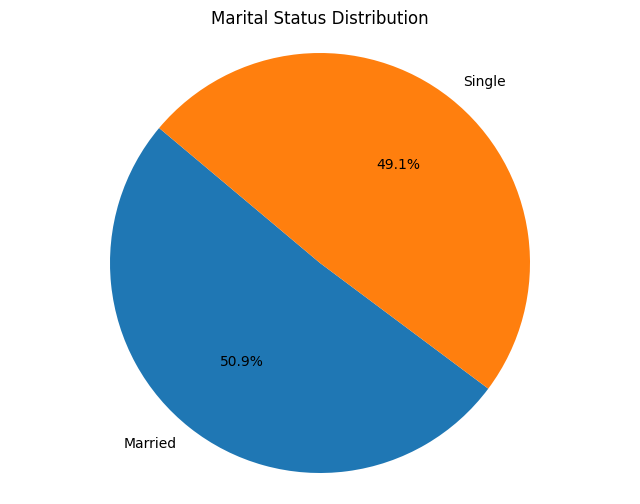

In [ ]:
married_counts=df['Married'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.axis('equal')
plt.show()

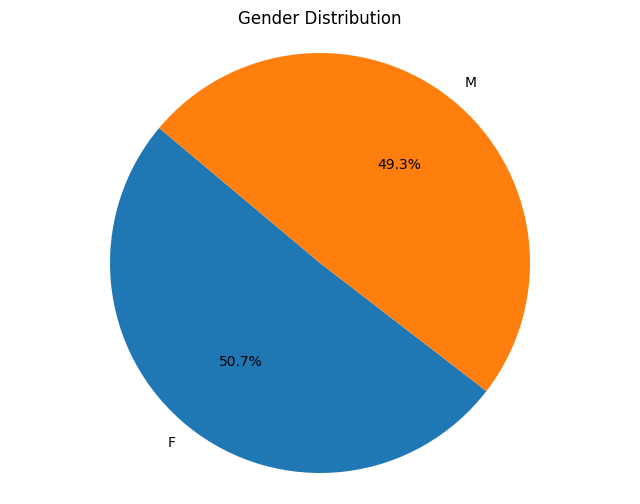

In [ ]:
gender_counts=df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

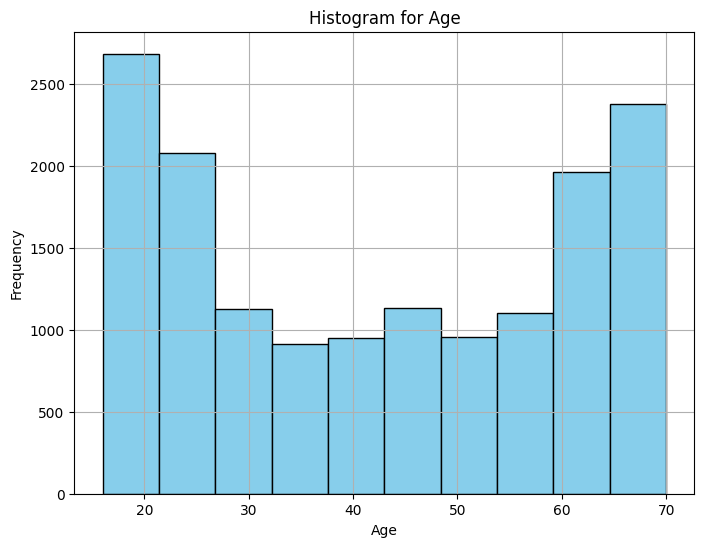

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram for Age')
plt.grid(True)
plt.show()

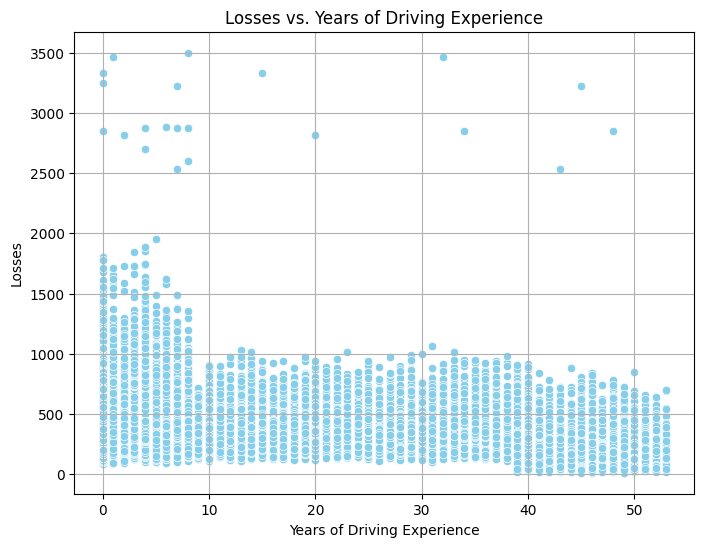

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Years of Driving Experience', y='Losses', data=df, color='skyblue')
plt.xlabel('Years of Driving Experience')
plt.ylabel('Losses')
plt.title('Losses vs. Years of Driving Experience')
plt.grid(True)
plt.show()

In [ ]:
df.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
0,24,5,1,M,Married,11,P,203.319595
1,31,10,1,F,Single,6,P,402.197302
2,56,37,1,M,Married,0,D,553.132096
3,52,31,1,F,Married,15,P,292.430579
4,20,3,1,M,Single,15,P,246.540576


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Fuel Type'] = le.fit_transform(df['Fuel Type'])

In [ ]:
df.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
0,24,5,1,1,0,11,1,203.319595
1,31,10,1,0,1,6,1,402.197302
2,56,37,1,1,0,0,0,553.132096
3,52,31,1,0,0,15,1,292.430579
4,20,3,1,1,1,15,1,246.540576


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df < lower_bound) | (df > upper_bound)

cleaned_df = df[~outliers.any(axis=1)]

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", cleaned_df.shape)

Original DataFrame shape: (15290, 8)
Cleaned DataFrame shape: (11663, 8)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X = cleaned_df.drop('Losses', axis=1)
y = cleaned_df['Losses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

feature_names = X.columns
rf_importances_sorted = sorted(zip(rf_importances, feature_names), reverse=True)
gb_importances_sorted = sorted(zip(gb_importances, feature_names), reverse=True)

rf_importances_sorted, rf_features_sorted = zip(*rf_importances_sorted)
gb_importances_sorted, gb_features_sorted = zip(*gb_importances_sorted)

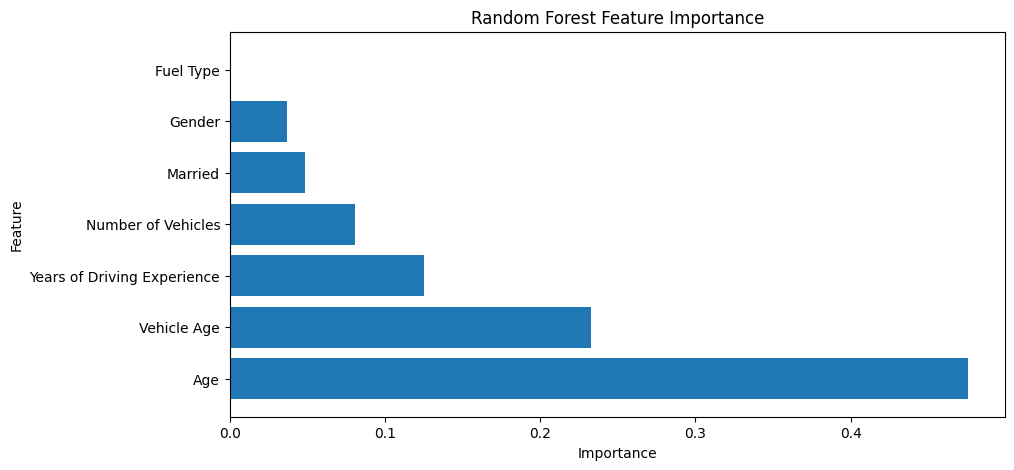

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(rf_features_sorted, rf_importances_sorted)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

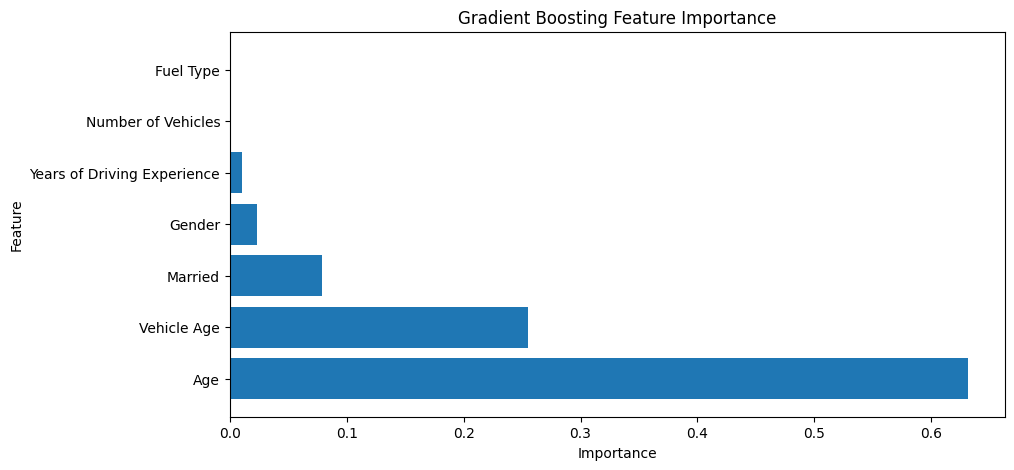

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(gb_features_sorted, gb_importances_sorted)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name}: Mean Squared Error = {mse}')

Linear Regression: Mean Squared Error = 10534.942668206699
Decision Tree: Mean Squared Error = 15025.289370243036
Random Forest: Mean Squared Error = 9570.757486976247
SVR: Mean Squared Error = 10926.001711266535
Gradient Boosting: Mean Squared Error = 7629.844865075853


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R^2): {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("")

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, name)

Linear Regression Metrics:
Mean Squared Error (MSE): 10534.9427
Mean Absolute Error (MAE): 84.3069
R-squared (R^2): 0.3406
Root Mean Squared Error (RMSE): 102.6399

Decision Tree Metrics:
Mean Squared Error (MSE): 15065.0631
Mean Absolute Error (MAE): 90.7188
R-squared (R^2): 0.0571
Root Mean Squared Error (RMSE): 122.7398

Random Forest Metrics:
Mean Squared Error (MSE): 9613.6555
Mean Absolute Error (MAE): 74.5209
R-squared (R^2): 0.3983
Root Mean Squared Error (RMSE): 98.0493

SVR Metrics:
Mean Squared Error (MSE): 10926.0017
Mean Absolute Error (MAE): 86.0970
R-squared (R^2): 0.3162
Root Mean Squared Error (RMSE): 104.5275

Gradient Boosting Metrics:
Mean Squared Error (MSE): 7629.8449
Mean Absolute Error (MAE): 68.0489
R-squared (R^2): 0.5225
Root Mean Squared Error (RMSE): 87.3490



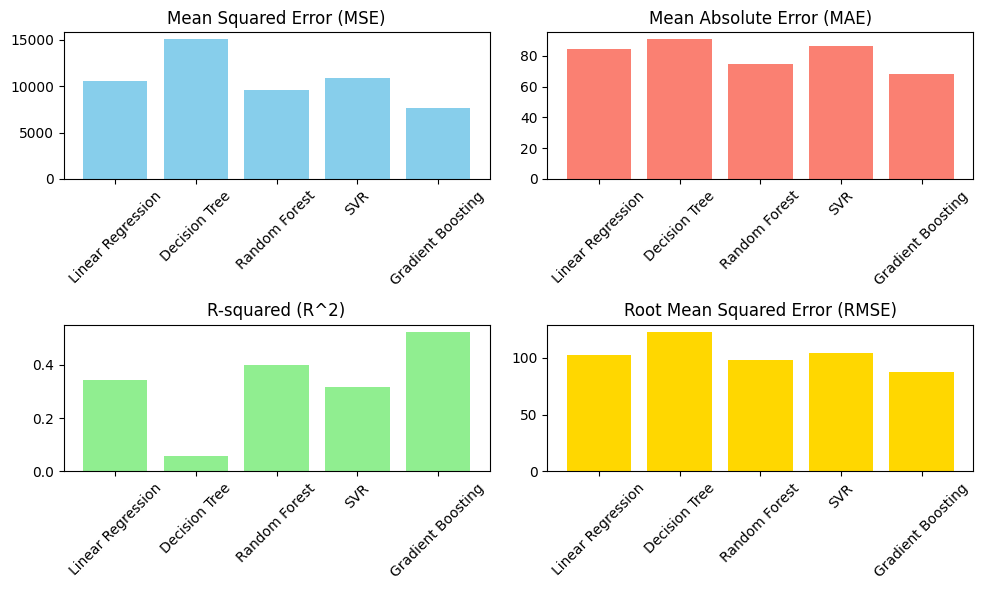

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'Gradient Boosting']
mse_values = [10534.9427, 15065.0631, 9613.6555, 10926.0017, 7629.8449]
mae_values = [84.3069, 90.7188, 74.5209, 86.0970, 68.0489]
r_squared_values = [0.3406, 0.0571, 0.3983, 0.3162, 0.5225]
rmse_values = [102.6399, 122.7398, 98.0493, 104.5275, 87.3490]

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(models, mae_values, color='salmon')
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(models, r_squared_values, color='lightgreen')
plt.title('R-squared (R^2)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(models, rmse_values, color='gold')
plt.title('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Selection of the Best Model:
Among the evaluated models, the Gradient Boosting Regression model demonstrates the best performance. It achieves the lowest MSE, MAE, and RMSE values, indicating smaller errors in prediction compared to other models. Additionally, the Gradient Boosting model exhibits the highest R-squared value (0.5225), suggesting that it explains a larger proportion of the variance in the target variable.

Conclusion:
Based on the evaluation metrics, we conclude that the Gradient Boosting Regression model is the most suitable for predicting losses in our dataset. Its superior performance in terms of MSE, MAE, RMSE, and R-squared values makes it the preferred choice for this regression task.

In [ ]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)
y_pred = gb_model.predict(X)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE) on training data:", mse)

Mean Squared Error (MSE) on training data: 7264.41239638168


In [ ]:
X = cleaned_df.drop('Losses', axis=1)
y = cleaned_df['Losses']

gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score

gb_model = GradientBoostingRegressor()
cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores

mean_mse = cv_scores.mean()
std_mse = cv_scores.std()

print("Cross-Validation Results:")
print("Mean Squared Error (MSE):", mean_mse)
print("Standard Deviation of MSE:", std_mse)

Cross-Validation Results:
Mean Squared Error (MSE): 7456.776645334621
Standard Deviation of MSE: 56.98766998631126


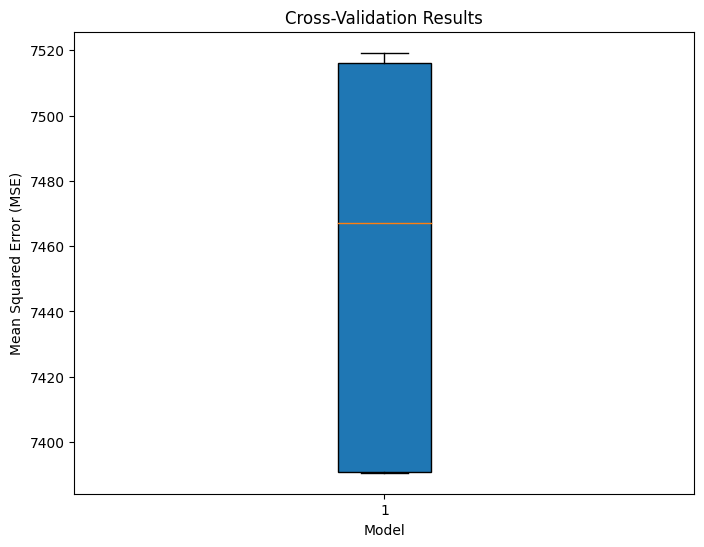

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores, patch_artist=True)
plt.title('Cross-Validation Results')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

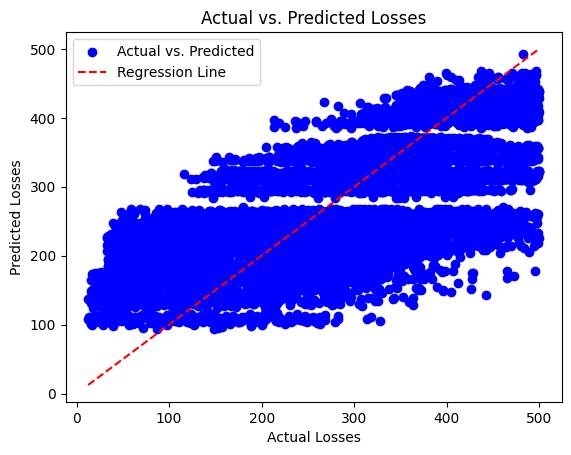

In [44]:
y_pred = gb_model.predict(X)

plt.scatter(y, y_pred, color='blue', label='Actual vs. Predicted')

plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Regression Line')
plt.xlabel('Actual Losses')
plt.ylabel('Predicted Losses')
plt.title('Actual vs. Predicted Losses')
plt.legend()

plt.show()

In [57]:
import joblib

joblib.dump(gb_model, 'model_mark11.pkl')

['model_mark11.pkl']

In [40]:
X.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type
0,24,5,1,1,0,11,1
1,31,10,1,0,1,6,1
3,52,31,1,0,0,15,1
4,20,3,1,1,1,15,1
5,29,8,1,1,0,9,1


In [45]:
def predict_insurance_loss(gb_model, X_columns):
    age = float(input("Enter Age: "))
    driving_experience = float(input("Enter Years of Driving Experience: "))
    num_vehicles = int(input("Enter Number of Vehicles: "))
    vehicle_age = float(input("Enter Vehicle Age: "))
    fuel_type = int(input("Enter Fuel Type (1 for P and 0 for D): "))
    gender = int(input("Enter Gender (1 for Male and 0 for Female): "))
    married = int(input("Enter Marital Status (1 for Married and 0 for Unmarried): "))

    input_data = pd.DataFrame([[age, driving_experience, num_vehicles, vehicle_age, gender, married, fuel_type]], columns=X_columns)
    predicted_loss = gb_model.predict(input_data)

    print("Predicted Loss:", predicted_loss[0])


In [48]:
predict_insurance_loss(gb_model, X.columns)

Enter Age: 15
Enter Years of Driving Experience: 0
Enter Number of Vehicles: 1
Enter Vehicle Age: 1
Enter Fuel Type (1 for P and 0 for D): 1
Enter Gender (1 for Male and 0 for Female): 1
Enter Marital Status (1 for Married and 0 for Unmarried): 0
Predicted Loss: 485.7638758239231


In [51]:
predict_insurance_loss(gb_model, X.columns)

Enter Age: 63
Enter Years of Driving Experience: 44
Enter Number of Vehicles: 2
Enter Vehicle Age: 6
Enter Fuel Type (1 for P and 0 for D): 1
Enter Gender (1 for Male and 0 for Female): 1
Enter Marital Status (1 for Married and 0 for Unmarried): 0
Predicted Loss: 248.9692979782095


In [54]:
predict_insurance_loss(gb_model, X.columns)

Enter Age: 25
Enter Years of Driving Experience: 8
Enter Number of Vehicles: 1
Enter Vehicle Age: 1
Enter Fuel Type (1 for P and 0 for D): 0
Enter Gender (1 for Male and 0 for Female): 1
Enter Marital Status (1 for Married and 0 for Unmarried): 1
Predicted Loss: 505.82495217464987


In [55]:
predict_insurance_loss(gb_model, X.columns)

Enter Age: 64
Enter Years of Driving Experience: 46
Enter Number of Vehicles: 3
Enter Vehicle Age: 11
Enter Fuel Type (1 for P and 0 for D): 1
Enter Gender (1 for Male and 0 for Female): 0
Enter Marital Status (1 for Married and 0 for Unmarried): 0
Predicted Loss: 243.35878930333644


In [56]:
predict_insurance_loss(gb_model, X.columns)

Enter Age: 19
Enter Years of Driving Experience: 1
Enter Number of Vehicles: 1
Enter Vehicle Age: 0
Enter Fuel Type (1 for P and 0 for D): 1
Enter Gender (1 for Male and 0 for Female): 1
Enter Marital Status (1 for Married and 0 for Unmarried): 0
Predicted Loss: 444.76585692790434


---

**Overview :**

In this project, we embarked on developing a regression model to predict insurance losses based on various factors such as age, driving experience, number of vehicles, vehicle age, fuel type, gender, and marital status. We meticulously executed a series of steps including data preprocessing, model training, evaluation, and interpretation to achieve our objective.

**Data Preprocessing:**
- Our journey commenced with thorough data preprocessing to ensure the quality and integrity of our dataset. We meticulously handled missing values, encoded categorical variables, and scaled numerical features to prepare the data for modeling.
- Notably, we identified and effectively handled outliers in the dataset, a critical step to prevent their undue influence on the model's performance. By carefully addressing outliers, we ensured the robustness and reliability of our regression model.

**Model Training and Evaluation:**
- A spectrum of regression models was explored, ranging from Linear Regression to more sophisticated techniques like Gradient Boosting Regression. Each model underwent rigorous training on the meticulously preprocessed dataset and was assessed using an array of evaluation metrics.
- Among the models evaluated, Gradient Boosting Regression emerged as the optimal choice, exhibiting superior performance across various metrics including the lowest Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values.

**Model Interpretation and Prediction:**
- Leveraging the trained Gradient Boosting Regression model, we gained valuable insights into the relative importance of different features in predicting insurance losses. This interpretability facilitates a deeper understanding of the underlying factors influencing insurance premiums.
- Furthermore, the model was deployed for real-time predictions, allowing users to input their demographic and vehicle-related information to obtain accurate estimates of their insurance losses. This empowers insurance companies and policyholders alike to make informed decisions.

**Applications :**
- The applications of our regression model extend beyond insurance pricing, encompassing various domains such as risk assessment, premium optimization, and personalized insurance offerings.
- By leveraging advanced modeling techniques and robust preprocessing strategies, insurance companies can enhance their risk management practices and tailor insurance products to individual policyholders.
- Moving forward, ongoing refinement and validation of the model are imperative to adapt to evolving market dynamics and ensure its applicability in diverse scenarios.

In essence, our comprehensive approach to developing a regression model for predicting insurance losses underscores its relevance and potential impact in the insurance industry and beyond.

